## 10 - Is there a correlation between a player's height and their ranking? 

In [1]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

home_files = glob('../data/raw/*/home_team_[0-9]*.parquet')
away_files = glob('../data/raw/*/away_team_[0-9]*.parquet')

In [2]:
cols = ['match_id', 'full_name', 'height', 'current_rank']

# Load home data
dfs = [pd.read_parquet(f, columns=cols).dropna() for f in home_files]
non_empty_dfs = [df for df in dfs if not df.empty]
df_home = pd.concat(non_empty_dfs, ignore_index=True)

# Load away data
dfs = [pd.read_parquet(f, columns=cols).dropna() for f in away_files]
non_empty_dfs = [df for df in dfs if not df.empty]
df_away = pd.concat(non_empty_dfs, ignore_index=True)

In [3]:
# Concat df_home_heights and df_away_heights and Clean data
df_all = pd.concat([df_home, df_away], axis=0).drop_duplicates(subset='full_name')
df_all.head()

,match_id,full_name,height,current_rank
0,12080595,"Caruso, Salvatore",1.85,291
1,12080174,"Catani, Leonardo",1.91,1251
2,12076846,"Dong, Jiayang",1.78,1454
3,12078716,"Kovacevic, Aleksandar",1.83,102
4,12076932,"Muller, Alexandre",1.83,73


In [4]:
# Convert columns to float
df_all['height'] = df_all['height'].astype(float)
df_all['current_rank'] = df_all['current_rank'].astype(float)

# Rename columns
df_all = df_all.rename(columns={'full_name': 'player', 'current_rank': 'ranking'})
df_all.head()

,match_id,player,height,ranking
0,12080595,"Caruso, Salvatore",1.85,291.0
1,12080174,"Catani, Leonardo",1.91,1251.0
2,12076846,"Dong, Jiayang",1.78,1454.0
3,12078716,"Kovacevic, Aleksandar",1.83,102.0
4,12076932,"Muller, Alexandre",1.83,73.0


In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1345 entries, 0 to 13151
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   match_id  1345 non-null   int64  
 1   player    1345 non-null   object 
 2   height    1345 non-null   float64
 3   ranking   1345 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 52.5+ KB


In [6]:
# Stats and correlation
corr, p_value = pearsonr(df_all['height'], df_all['ranking'])
print(f"Players analyzed: {len(df_all)}")
print(f"Correlation: {corr:.3f} (p={p_value:.3g})")

Players analyzed: 1345
Correlation: 0.106 (p=9.72e-05)


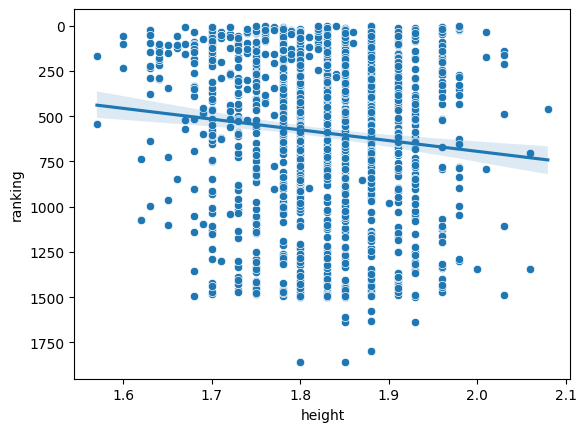

In [7]:
# Visualization
sns.scatterplot(x='height', y='ranking', data=df_all.reset_index(drop=True))
sns.regplot(x='height', y='ranking', data=df_all, scatter=False)
plt.gca().invert_yaxis()
plt.savefig('../data/output/figures/img10.png')
plt.show()

In [8]:
# Enhanced conclusion
print("\nStatistical Analysis Conclusion:")

if abs(corr) < 0.3:
    strength = "no significant"
elif abs(corr) < 0.5:
    strength = "weak"
elif abs(corr) < 0.7:
    strength = "moderate"
else:
    strength = "strong"

print(f"* {strength.capitalize()} correlation between height and ranking (Correlation = {corr:.2f})")



Statistical Analysis Conclusion:
* No significant correlation between height and ranking (Correlation = 0.11)
